<a href="https://colab.research.google.com/github/Jaxy205/TriTueNhanTao/blob/main/2001230349_TTNT_Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Họ và tên: Lưu Trí Kiệt
### MSSV: 2001230349
### Báo cáo: K-Means

# 1. Lý thuyết thuật toán K-Means Clustering

**K-Means** là một thuật toán học máy không giám sát (Unsupervised Learning) phổ biến, được sử dụng để giải quyết bài toán phân cụm (Clustering).

### Mục tiêu
Mục tiêu của K-Means là phân chia tập dữ liệu gồm $N$ điểm vào $K$ nhóm (clusters) riêng biệt sao cho các điểm trong cùng một nhóm có tính chất tương đồng nhau nhất có thể.

Cụ thể, thuật toán cố gắng giảm thiểu **Tổng bình phương khoảng cách** (Inertia hoặc Within-Cluster Sum of Squares - WCSS) giữa mỗi điểm dữ liệu và tâm cụm (centroid) của nó.

### Quy trình hoạt động

Thuật toán hoạt động theo quy trình lặp (iterative) gồm 4 bước chính:

1.  **Khởi tạo (Initialization):** Chọn ngẫu nhiên $K$ điểm làm tâm cụm ban đầu (centroids).
2.  **Gán nhãn (Assignment):** Với mỗi điểm dữ liệu, tính khoảng cách đến tất cả các tâm cụm và gán nó vào cụm có tâm gần nhất.
3.  **Cập nhật tâm (Update):** Tính toán lại vị trí tâm cụm mới bằng cách lấy trung bình cộng (mean) tọa độ của tất cả các điểm thuộc cụm đó.
4.  **Lặp (Repeat):** Lặp lại bước 2 và 3 cho đến khi thuật toán hội tụ (tâm cụm không thay đổi vị trí hoặc thay đổi rất ít).

### Công thức toán học

**1. Khoảng cách Euclidean:**
Khoảng cách giữa điểm dữ liệu $x$ và tâm cụm $c$ thường được tính bằng khoảng cách Euclidean:
$$d(x, c) = ||x - c||^2 = \sum_{j=1}^{d} (x_j - c_j)^2$$

**2. Hàm mục tiêu (Objective Function):**
K-Means tối ưu hóa hàm mất mát $J$ (Inertia):
$$J = \sum_{k=1}^{K} \sum_{x_i \in C_k} ||x_i - \mu_k||^2$$

*Trong đó:*
* $K$: Số lượng cụm.
* $C_k$: Tập hợp các điểm thuộc cụm thứ $k$.
* $\mu_k$: Tâm cụm (centroid) của cụm $k$.

### Cách chọn K (Elbow Method)
Để chọn số lượng cụm $K$ tối ưu, ta thường sử dụng **Phương pháp khuỷu tay (Elbow Method)**:
* Chạy K-Means với nhiều giá trị $K$ khác nhau (ví dụ: từ 1 đến 10).
* Vẽ biểu đồ giá trị **WCSS (Inertia)** theo $K$.
* Chọn $K$ tại điểm mà đồ thị bắt đầu gập lại (giống khuỷu tay), nơi việc tăng thêm cụm không làm giảm WCSS đáng kể nữa.

Import các thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Khởi tạo dữ liệu

In [ ]:
means = [[2, 2], [9, 2], [4, 9], [9,9], [36, 63]]
cov = [[2, 0], [0, 2]]
n_samples = 1800
n_cluster = 4

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X3 = np.random.multivariate_normal(means[3], cov, n_samples)
X4 = np.random.multivariate_normal(means[4], cov, n_samples)


X = np.concatenate((X0, X1, X2, X3, X4), axis = 0)

Vẽ minh họa cho dữ liệu mới khởi tạo

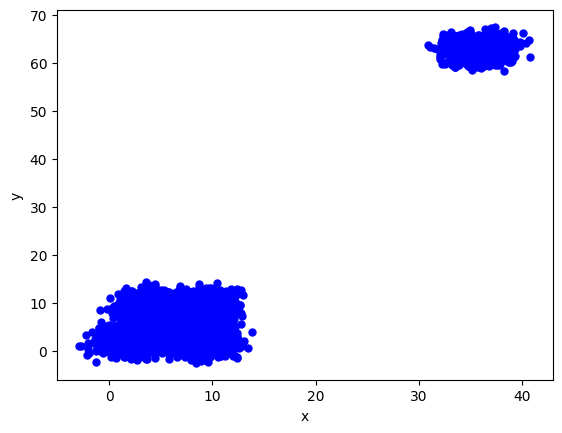

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

Khởi tạo các tâm ban đầu

In [ ]:
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

Tính toán khoảng cách

In [ ]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis=1)

In [ ]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

Hàm kiểm tra xem K-Means đã hội tụ chưa

In [ ]:
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

Vẽ minh họa K-Means

In [ ]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)

  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label ='cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o', markersize=10, label='center_' + str(i))
  plt.legend()
  plt.show()

Thuật toán K-Means

In [ ]:
def kmeans(init_centers, init_labels, X, n_cluster):
  centers = init_centers
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

Chạy thuật toán

[[ 9.09268744  6.8246643 ]
 [ 1.89970704 -1.00055221]
 [36.91425739 62.1264618 ]
 [ 9.73424896  6.52565412]]


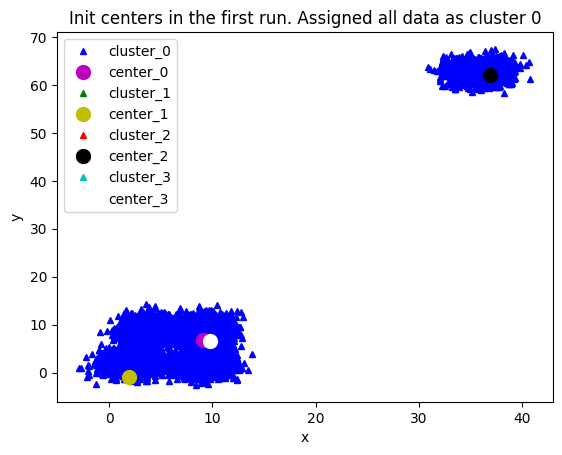

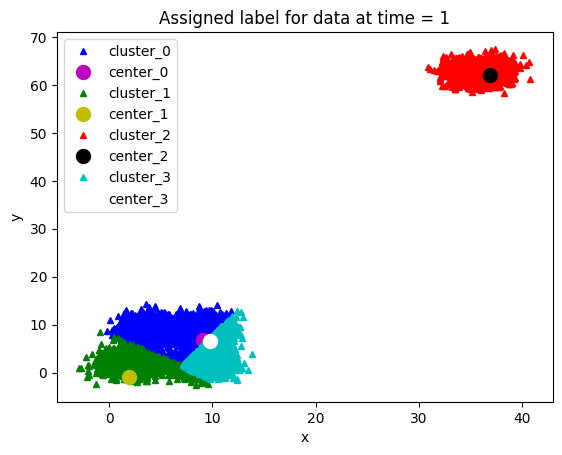

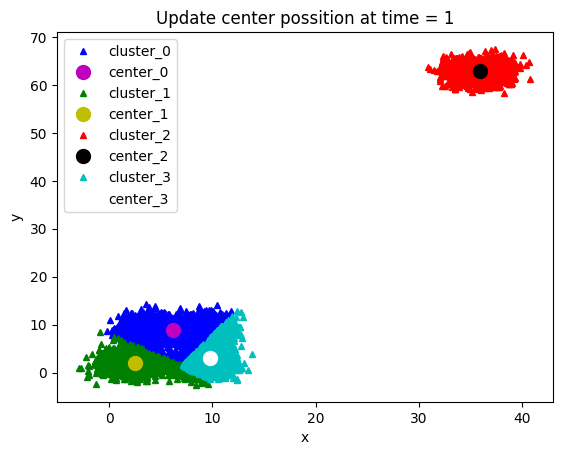

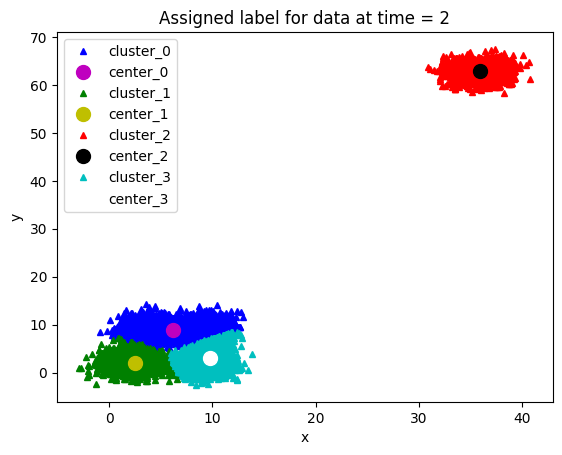

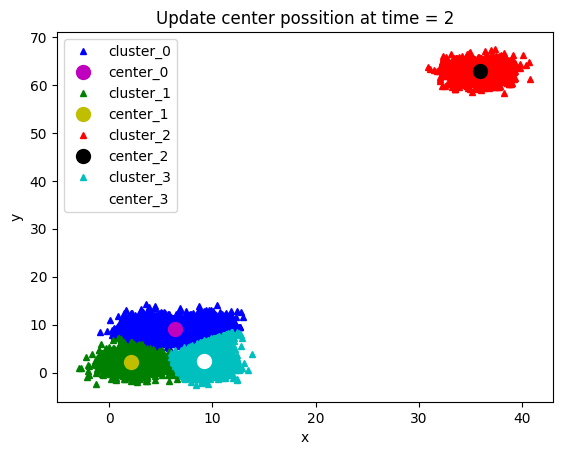

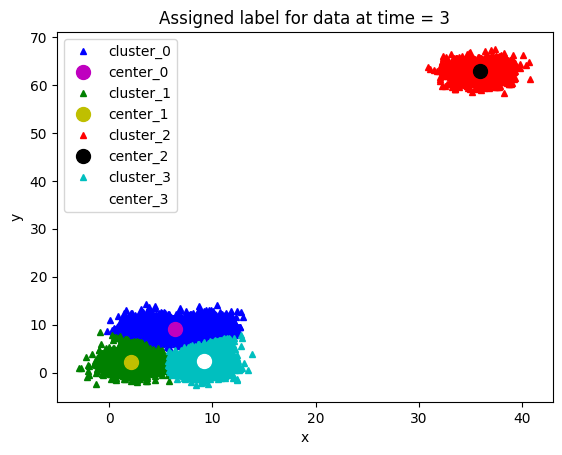

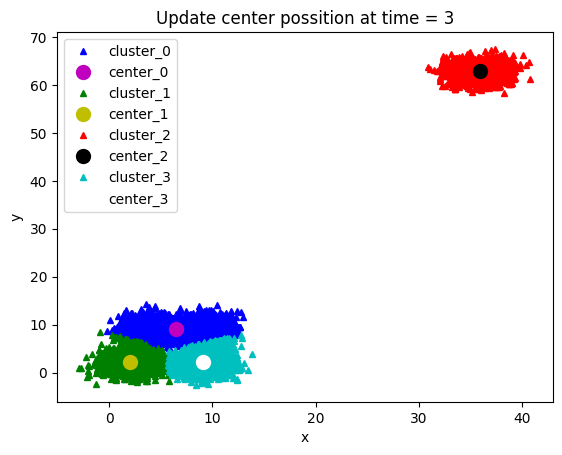

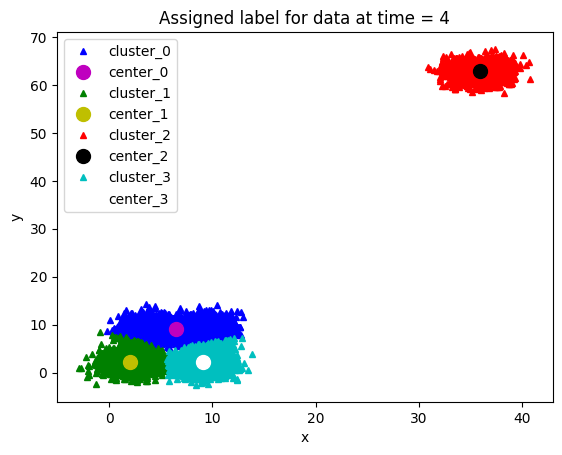

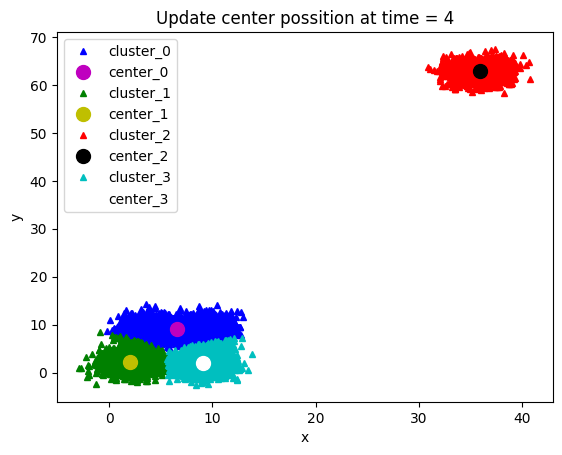

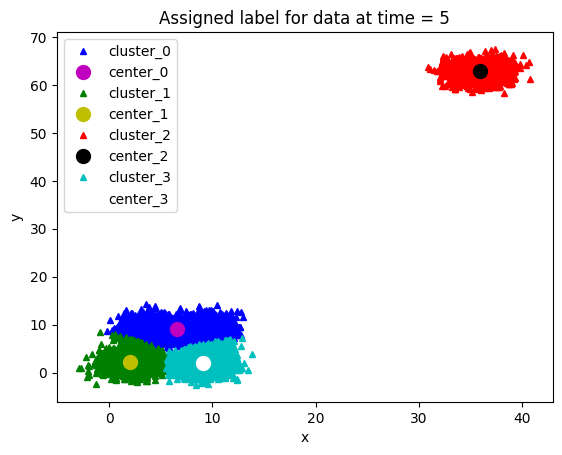

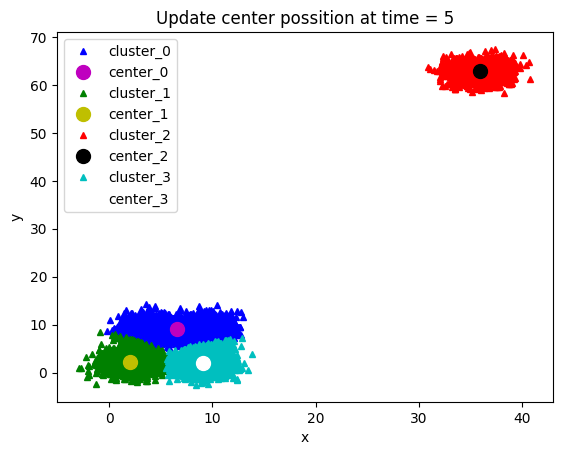

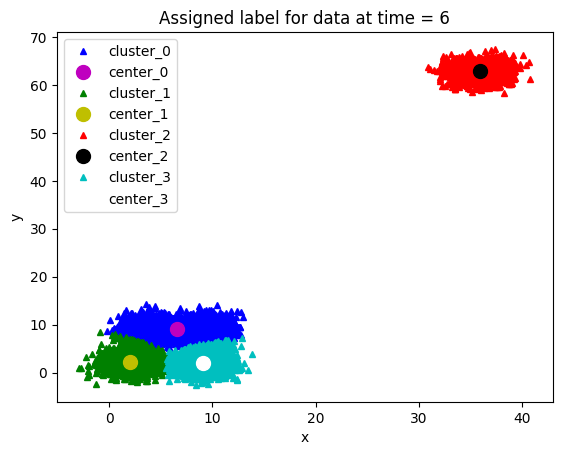

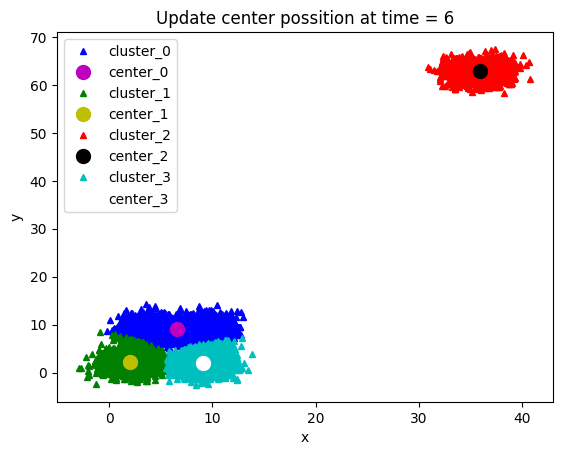

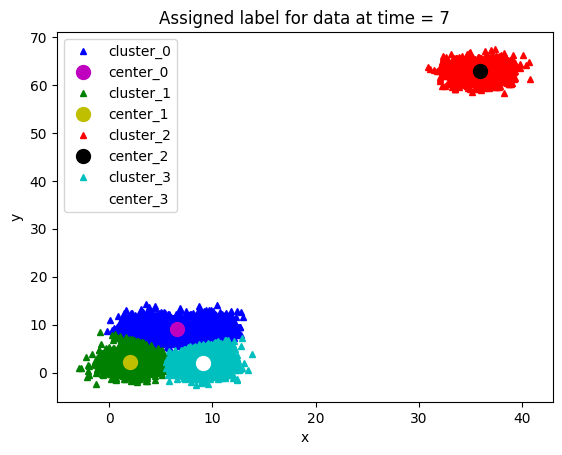

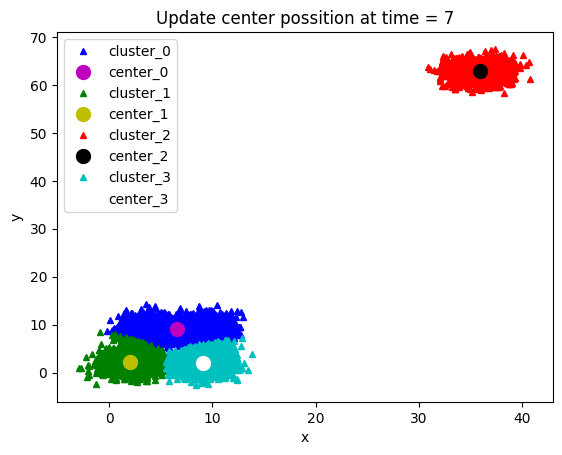

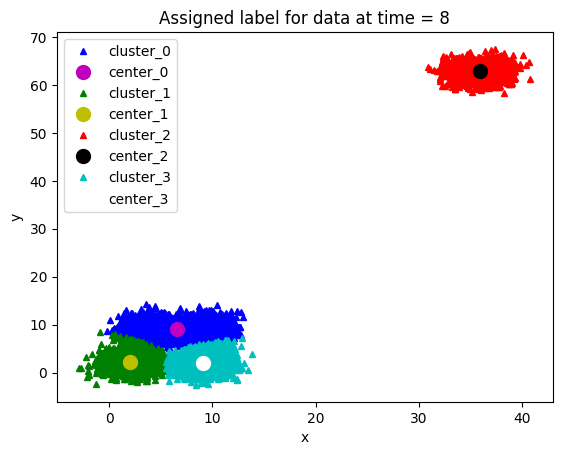

Done! Kmeans has converged after 7 times
[[ 6.53283602  9.09798613]
 [ 1.99741808  2.20896336]
 [35.95903488 62.93855243]
 [ 9.05837741  2.08367404]]


In [ ]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Done! Kmeans has converged after', times, 'times')
print(centers)